In [22]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Parámetros para el dataset
tickers = ["MSFT", "CMCSA", "COST", "AAPL", "QCOM", 
            "ADBE", "SBUX", "INTU", "AMD", "INTC"]

start = "2005-01-01"                                # rango temporal
end   = "2025-10-15"
normalize_to_100 = False                            # True para normalizar todas a 100 (facilita comparación)
price_field = "Close"

# Descarga del dataset
prices = yf.download(tickers, start=start, end=end, auto_adjust=False, progress=False)

In [23]:
# separo las columnas de cada ticker en distintos dataframes.
dfs = {ticker: prices.xs(ticker, axis=1, level=1)[["Open", "High", "Low", "Close", "Volume"]].copy() for ticker in tickers}

In [24]:
# guardo los archivos en un csv
for ticker in tickers:
    dfs[ticker].to_csv(f"./prices/{ticker}_prices.csv")
    print(f"Archivo '{ticker}_prices.csv' guardado correctamente.")

Archivo 'MSFT_prices.csv' guardado correctamente.
Archivo 'CMCSA_prices.csv' guardado correctamente.
Archivo 'COST_prices.csv' guardado correctamente.
Archivo 'AAPL_prices.csv' guardado correctamente.
Archivo 'QCOM_prices.csv' guardado correctamente.
Archivo 'ADBE_prices.csv' guardado correctamente.
Archivo 'SBUX_prices.csv' guardado correctamente.
Archivo 'INTU_prices.csv' guardado correctamente.
Archivo 'AMD_prices.csv' guardado correctamente.
Archivo 'INTC_prices.csv' guardado correctamente.


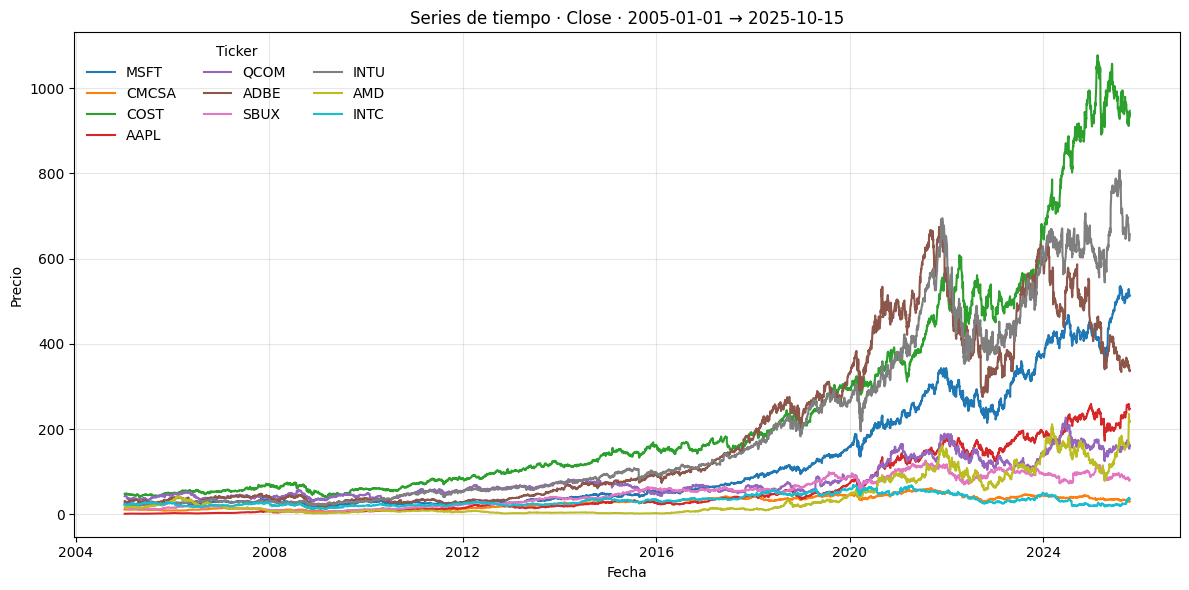

In [25]:
# Normalización por si llega a hacer falta (opcional)
plot_data = prices[price_field].copy()
if normalize_to_100:
    plot_data = (plot_data / plot_data.iloc[0]) * 100

# Ploteo
plt.figure(figsize=(12, 6))
for ticker in tickers:
    plt.plot(plot_data.index, plot_data[ticker], label=ticker)
titulo = "Series de tiempo" if not normalize_to_100 else "Series normalizadas (base = 100)"
plt.title(f"{titulo} · {price_field} · {start} → {end}")
plt.xlabel("Fecha")
plt.ylabel("Precio" if not normalize_to_100 else "Índice (base=100)")
plt.grid(True, alpha=0.3)
plt.legend(title="Ticker", ncol=3, frameon=False)
plt.tight_layout()
plt.show()

# ***2. Representación del Grafo de Stocks***

#### ***Relaciones lineales: Correlación de Pearson***

Se establecen las dependencias entre stocks generando un grafo $G(V, E)$ donde $V$ es el dominio de vertices y $E$ el de arístas que representan la relación entre 2 stocks.

El coeficiente de correlación de Pearson se calcula mediante el retorno diario de pares de acciones. El retorno diario para un stock en un tiempo $t$ se computa:

$$r_t = \frac{P_t - P_{t-1}}{P_{t-1}}$$

donde $P_t$ es el precio en el tiempo $t$. El coeficiente de Pearson $\rho_{ij}$     entre los stocks $i$ y $j$ se computa:

$$\rho_{ij}=\frac{\sum^{n}_{t=1}(r_{i,t}-r̄_i)(r_{j,t}-r̄_j)}
{\sqrt{\sum^{n}_{t=1}(r_{i,t}-r̄_i)²} \sqrt{\sum^{n}_{t=1}(r_{j,t}-r̄_j)²}}$$

Se establece la relación cuando $|\rho_{ij}| > 0.7$, lo que indica una fuerte relación lineal entre los stocks. 

#### ***Relaciones No-Lineales: Apriori Algorithm***

Para capturar las relaciones no lineales, se hace un analisis mediante el Apriori algorithm. Se analiza el *support* (fracción de días que dos acciones se mueven en conjunto), y la *confidence* (la probabilidad de que un stock se haya movido como respuesta de la fluctacion de otro stock). *Lift* se usa para comparar cuando el co-movimiento es más fuerte que aleatoreidad del movimiento. 

Se aplica un threshold de 1.7, lo que significa que el 70% de las veces dos acciones se mueven juntas y no independientemente.